# Data understanding

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
cm = plt.cm.RdBu_r

%run Utilyties.ipynb

In [44]:
data = read_data('../data/data_complete.json')
h_classification = read_data('../data/hashtags_classification.json')

## Dataset 

In [45]:
df = pd.DataFrame(data)
df.head()

,tweet_id,user,date,hashtags,mentions,retweets,reply_to,quote_to,followers,following,tweets,tweet_classification,user_classification,vip
0,0a0f0b09030209080c0e090a0a0d0a0f090b03,5d5e5f5e495258545554485e505a52,2021-06-10T07:36:21.000Z,"[EURO2020, blm]",[],[],[],[],118,239,5430,-1.0,1.047619,0
1,0a0f0b080b0b0f080f08080a0f080b0e0b080a,775a7d495a555852090c,2021-06-10T15:01:16.000Z,"[Euro2020, NoKnees, Ungheria, SouthGate, BLM]",[],[],[5554555054555d5449565e],[],10180,4708,4112,-1.0,0.500000,0
2,0a0f0b080b0d0d090a080b0d020a0c090c0f0a,7a575e43685a55555a0803,2021-06-10T19:07:07.000Z,"[BLM, EURO2020]",[],[],[],[],431,276,13648,-1.0,1.218750,0
3,0a0f0b080f0b0d0b080803090d0b0c0f0d080a,785a575852546b52575754575e,2021-06-11T17:37:27.000Z,"[FA, Euro2020, BlacklivesMatter, Inghilterra]",[],[],[],[],8989,5378,16360,-1.0,-1.000000,0
4,0a0f0b080f0b0c0b0309020a080c0d0c0f0902,565a494f52555a03646464,2021-06-11T17:41:37.000Z,"[FA, Euro2020, BlacklivesMatter, Inghilterra]",[],[785a575852546b52575754575e],[],[],83,116,156,-1.0,-1.000000,0


In [46]:
print(f"From:\t{pd.to_datetime(df['date']).min().strftime('%m/%d/%Y, %H:%M:%S')}\nTo:\t{pd.to_datetime(df['date']).max().strftime('%m/%d/%Y, %H:%M:%S')}")

From:	06/10/2021, 07:36:21
To:	07/12/2021, 23:13:36


In [47]:
print(f"N. of rows (tweets):\t{df.tweet_id.nunique()}")
print(f"N. of different users:\t{df.user.nunique()}")

N. of rows (tweets):	38908
N. of different users:	16235


In [48]:
print(f"N. of different hashtags:\t{df['hashtags'].explode().str.lower().unique().size}")

N. of different hashtags:	2304


In [49]:
df_h = pd.DataFrame(h_classification)
print('N. of hashtags for each C\u2095')
df_h.groupby('type').size()

N. of hashtags for each Cₕ


type
-3      14
-1     166
 0    4203
 1     130
 3      40
dtype: int64

In [50]:
n_users = df.user.value_counts()
n_users_pro = df[df['user_classification']<=-.5].user.value_counts()
n_users_cons = df[df['user_classification']>=.5].user.value_counts()

In [51]:
n_tweets = df.tweet_id.value_counts()
n_tweets_pro = df[df['tweet_classification']<=-.5].tweet_id.value_counts()
n_tweets_cons = df[df['tweet_classification']>=.5].tweet_id.value_counts()

In [52]:
d = {'all': [n_users.size, 
             n_tweets.size, 
             round(n_users.mean(),2),
             round(n_users.var(),2),
             round(n_users.median(),2)], 
     
     'pro': [n_users_pro.size, 
             n_tweets_pro.size,
             round(n_users_pro.mean(),2),
             round(n_users_pro.var(),2),
             round(n_users_pro.median(),2)],
     
     'cons': [n_users_cons.size, 
              n_tweets_cons.size,
              round(n_users_cons.mean(),2),
              round(n_users_cons.var(),2),
              round(n_users_cons.median(),2)]}

header=[np.array(['','','tweet \ user','tweet \ user','tweet \ user']),np.array(['n. users', 'n. tweets', 'mean', 'variance', 'median'])]
df_comparison = pd.DataFrame(data=d).T.set_axis(header, axis=1, inplace=False)
df_comparison

tweet \ user                
     n. users n. tweets         mean variance median
all   16235.0   38908.0         2.40    30.83    1.0
pro    7949.0   17570.0         2.05    37.44    1.0
cons   5970.0   16015.0         2.97    29.67    1.0

In [53]:
temp_n_pro = []
temp_n_cons = []
temp_n_neutral = []

temp_median_pro = []
temp_median_cons = []

for i in range(5):
    # df of users who posted at least i+1 tweet
    n_users_pro = df[df['user_classification']<=-.5].user.value_counts().loc[lambda s: s > i]
    n_users_cons = df[df['user_classification']>=.5].user.value_counts().loc[lambda s: s > i]
    n_users_neutral = df[(df['user_classification'] > -0.5) & (df['user_classification'] < 0.5)].user.value_counts().loc[lambda s: s > i]
        
    temp_n_pro.append(n_users_pro.size) # lista del numero di utenti a favore che hanno pubblicato almeno i+1 tweet
    temp_n_cons.append(n_users_cons.size) # lista del numero di utenti contrari che hanno pubblicato almeno i+1 tweet
    temp_n_neutral.append(n_users_neutral.size) # lista numero di utenti neutri che hanno pubblicato almeno i+1 tweet
    
    temp_median_pro.append(n_users_pro.median())
    temp_median_cons.append(n_users_cons.median())


In [54]:
df_users = pd.DataFrame({'Pro': temp_n_pro,
                      'Cons': temp_n_cons,
                      'Neutral': temp_n_neutral})

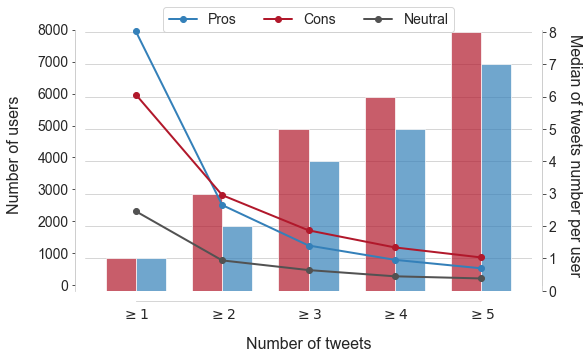

In [55]:
x = np.arange(5)
width = 0.35  # ampiezza dei tweet

sns.set_style('whitegrid')
fig, ax2 = plt.subplots(figsize=(8,5))

ax2.plot(df_users['Pro'],
         linestyle='-',
         marker='o', color = '#3480b9', linewidth=2, label='Pros')

ax2.plot(df_users['Cons'],
         linestyle='-',
         marker='o', color = '#b1182b', linewidth=2, label='Cons')

ax2.plot(df_users['Neutral'],
         linestyle='-',
         marker='o', color = '#525252', linewidth=2, label='Neutral')

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=3, fancybox=True, shadow=False, fontsize=14)

ax = ax2.twinx()
ax.bar(x + width/2, temp_median_pro, width, color = '#3480b9', alpha=.7,)
ax.bar(x - width/2, temp_median_cons, width, color = '#b1182b', alpha=.7)

ax.set_ylabel('Median of tweets number per user', labelpad=25, rotation=-90, fontsize=16)
ax.set_xticks(x)

ax2.set_zorder(ax.get_zorder()+1)
ax2.patch.set_visible(False)

sns.despine(top=True, right=False, left=False, bottom=False, offset=10, trim=True)
sns.despine(top=True, right=False, left=False, bottom=True, offset=10, trim=True, ax = ax2)

ax2.set_ylabel('Number of users', labelpad=15, fontsize=16)
ax2.xaxis.grid(False) # Show the vertical gridlines
ax2.yaxis.grid(False) # Hide the horizontal gridlines

plt.xticks(range(5), ['$\geq 1$','$\geq 2$','$\geq 3$','$\geq 4$','$\geq 5$'])
ax2.set_xlabel("Number of tweets", labelpad=15, fontsize=16)

ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

plt.show()

# Opinions distribution

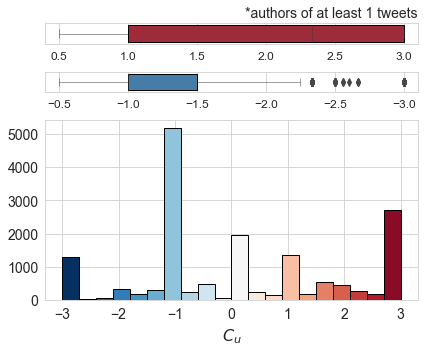

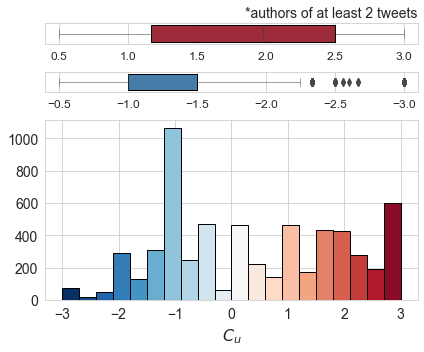

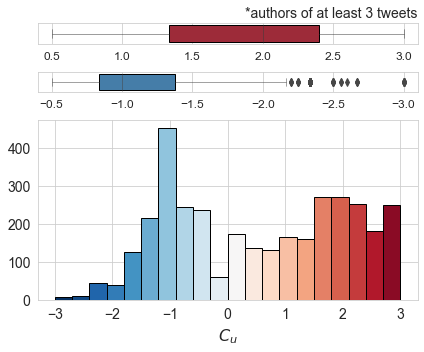

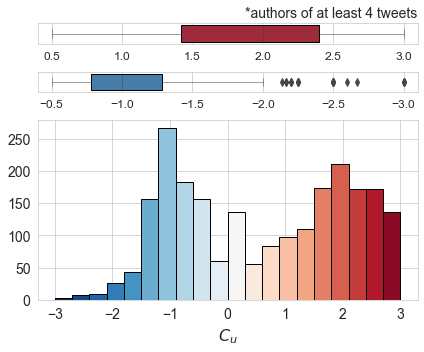

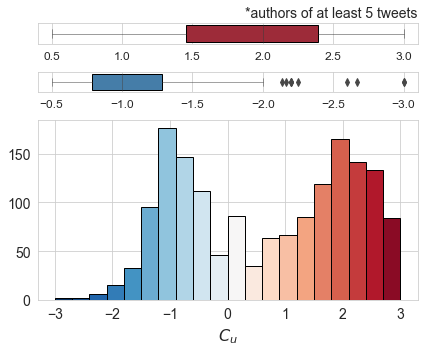

In [61]:
num = 20
for m in range(5):
    occ = df.user.value_counts()
    n_users = df[df.user.isin(occ.index[occ.gt(m)])].groupby('user').mean()[['user_classification']]
    
    f, (ax_box, ax_box2, ax_hist) = plt.subplots(3, figsize=(6,5), sharex=False, gridspec_kw={"height_ratios": (.09, .09, .8)})
    f.subplots_adjust(hspace=.07)

    sns.boxplot(x = n_users[n_users['user_classification'] >= 0.5]['user_classification'], 
                color=cm(230), linewidth = 0.5, ax=ax_box).tick_params(labelsize=12)

    sns.boxplot(x = n_users[n_users['user_classification'] <= -0.5]['user_classification'], 
                color=cm(40), linewidth = 0.5, ax=ax_box2).tick_params(labelsize=12)
    
    for box in [ax_box, ax_box2]:
        box.artists[0].set_edgecolor('black')
        box.artists[0].set_linewidth(1)

    n, bins, patches = plt.hist(n_users['user_classification'], num, edgecolor='black')
    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i/num)) 

    ax_box.set(xlabel='')
    ax_box2.set(xlabel='')

    ax_box.set_xlim(0.4, 3.1)
    ax_box2.set_xlim(-3.1, -0.4)
    ax_box2.invert_xaxis() 

    ax_hist.set_xlabel('$C_{u}$', labelpad=5, fontsize=16)
    ax_hist.tick_params(axis='both', labelsize=14)

    ax_box.set_title(f'*authors of at least {m+1} tweets', loc='right', size=14)

    f.tight_layout()
    plt.show()

# Hashtags

In [62]:
col         = 'user_classification'
conditions  = [ df[col] >= 0.5, (df[col] < 0.5) & (df[col] > -0.5), df[col] <= -0.5 ]
choices     = [ "cons", 'neutral', 'pro' ]
    
df["user_classification"] = np.select(conditions, choices, default=np.nan)

df.head()

,tweet_id,user,date,hashtags,mentions,retweets,reply_to,quote_to,followers,following,tweets,tweet_classification,user_classification,vip
0,0a0f0b09030209080c0e090a0a0d0a0f090b03,5d5e5f5e495258545554485e505a52,2021-06-10T07:36:21.000Z,"[EURO2020, blm]",[],[],[],[],118,239,5430,-1.0,cons,0
1,0a0f0b080b0b0f080f08080a0f080b0e0b080a,775a7d495a555852090c,2021-06-10T15:01:16.000Z,"[Euro2020, NoKnees, Ungheria, SouthGate, BLM]",[],[],[5554555054555d5449565e],[],10180,4708,4112,-1.0,cons,0
2,0a0f0b080b0d0d090a080b0d020a0c090c0f0a,7a575e43685a55555a0803,2021-06-10T19:07:07.000Z,"[BLM, EURO2020]",[],[],[],[],431,276,13648,-1.0,cons,0
3,0a0f0b080f0b0d0b080803090d0b0c0f0d080a,785a575852546b52575754575e,2021-06-11T17:37:27.000Z,"[FA, Euro2020, BlacklivesMatter, Inghilterra]",[],[],[],[],8989,5378,16360,-1.0,pro,0
4,0a0f0b080f0b0c0b0309020a080c0d0c0f0902,565a494f52555a03646464,2021-06-11T17:41:37.000Z,"[FA, Euro2020, BlacklivesMatter, Inghilterra]",[],[785a575852546b52575754575e],[],[],83,116,156,-1.0,pro,0


In [63]:
# df with the 500 most used hashtags for each part (pro, cons)
def get_hashtags_df(part, name):
    df_hashtags = df[df['user_classification']==part].hashtags.explode().str.lower().value_counts().rename(name).head(500)
    return df_hashtags

In [64]:
df_hashtags_pro = get_hashtags_df('pro', 'pro_occ')
df_hashtags_cons = get_hashtags_df('cons', 'cons_occ')

In [65]:
df_hashtags_comparison = pd.concat([df_hashtags_pro, df_hashtags_cons], axis=1)
df_hashtags_comparison.fillna(0, inplace=True)
df_hashtags_comparison.head()

,pro_occ,cons_occ
blacklivesmatter,9435.0,2801.0
inginocchiarsi,5363.0,4773.0
italiaaustria,3459.0,2917.0
euro2020,2928.0,1740.0
italiabelgio,2255.0,1155.0


In [66]:
# elimination of neutral and/or irrelevant hashtags
df_hashtags_comparison.drop(['ita','italia','nazionale','azzurri','nazionaleitaliana','vivoazzurro','staseraitalia','forzaazzurri','mancini',
                   'figc','euro2020','euro2021','europei2021','uefa','calcio','bel','marchisio','biani','rampini','maglia',
                   'belgioportogallo','belpor','itawal','italiagalles','italiaaustria','itaaus','austria','itaaut','belita','italiabelgio','belgioitalia','itabel','belgio','italiainghilterra','itaeng',
                   'chiellini','bonucci','lukaku','spinazzola',
                   #'bastasalaridafame','iostoconilpoliziotto','facciamorete',
                   '25giugno','26giugno','27giugno','28giugno'], inplace=True)

In [67]:
# selection of 50 most used hashtag

# normalizzazione degli hashtag con lo stesso significato
df_hashtags_comparison.rename(index={'blm': 'blacklivesmatter','blacklivesmetter':'blacklivesmatter',
                           'iononminginocchio':'iononmiinginocchio', 'nonmiinginocchio':'iononmiinginocchio', 
                           'iominginocchio':'iomiinginocchio', 'miinginocchio':'iomiinginocchio', 
                           'antifa':'antifascista',
                           'endracism':'antirazzismo','antirazzista':'antirazzismo','noracism':'antirazzismo',
                           'noue':'noeuro'
                          }, inplace=True)

df_hashtags_comparison = df_hashtags_comparison.iloc[df_hashtags_comparison.mean(axis=1).argsort()[::-1][:50]]
df_hashtags_comparison = df_hashtags_comparison.sum(level=0) # conteggio aggiornato


In [68]:
hashtags_general = df_hashtags_comparison.loc[['inginocchiarsi','blacklivesmatter','iononmiinginocchio','iomiinginocchio']]
hashtags_general

,pro_occ,cons_occ
inginocchiarsi,5363.0,4773.0
blacklivesmatter,11252.0,3637.0
iononmiinginocchio,2143.0,14327.0
iomiinginocchio,1585.0,121.0


In [69]:
df_hashtags_comparison.drop(['inginocchiarsi','blacklivesmatter','iononmiinginocchio','iomiinginocchio'], inplace=True)

In [70]:
# hashtags reordered based on user usage in favor
df_hashtags_comparison.sort_values(by=['pro_occ','cons_occ'], ascending = False, inplace=True)

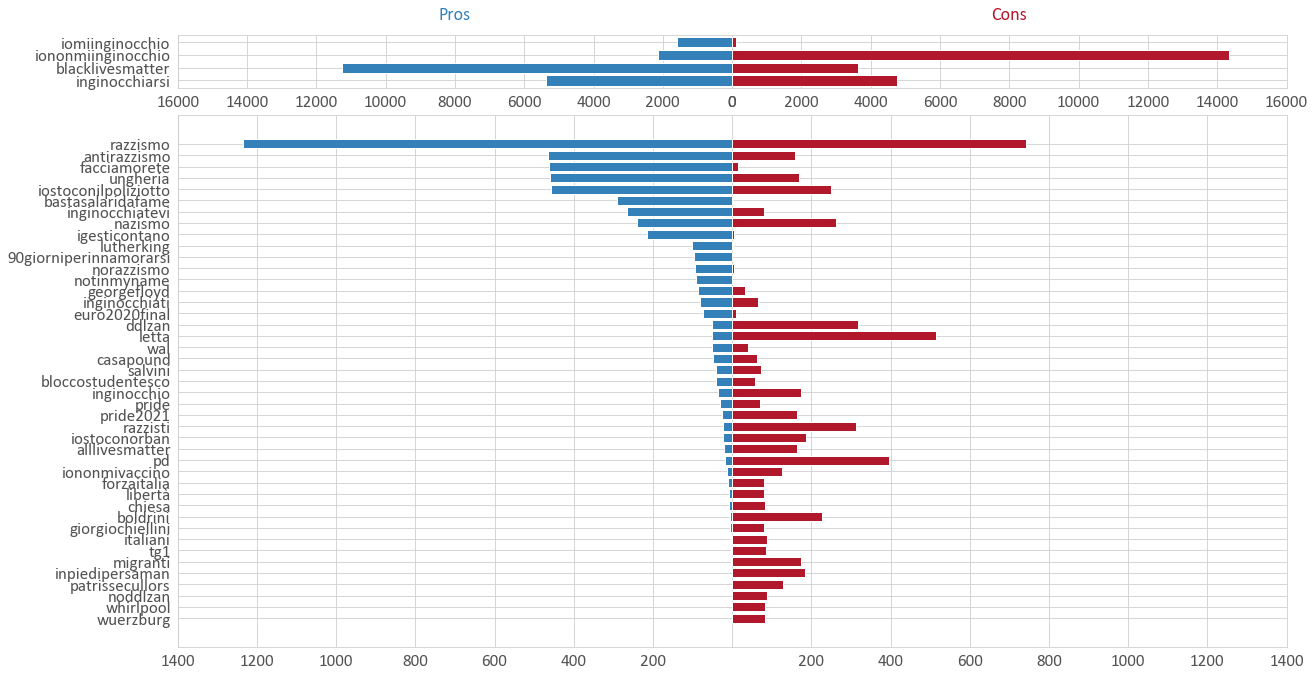

In [71]:
### Plot specifics ###
sns.set_style("whitegrid")
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_blue = cm(40)
color_red = cm(230)

### Plot data ###
index_f = hashtags_general.index
column0_f = hashtags_general['pro_occ']
column1_f = hashtags_general['cons_occ']

index = df_hashtags_comparison.index
column0 = df_hashtags_comparison['pro_occ']
column1 = df_hashtags_comparison['cons_occ']

title0 = 'Pros'
title1 = 'Cons'

### Plot ###
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, nrows=2, ncols=2, gridspec_kw={
                           'height_ratios': [.2, 2]})
fig.tight_layout()

axes[0,0].get_shared_y_axes().join(axes[0,0], axes[0,1])

axes[0,0].barh(index_f, column0_f, align='center', color=color_blue, zorder=10)
axes[0,0].set_title(title0, fontsize=18, pad=15, color=color_blue, **hfont)
axes[0,1].barh(index_f, column1_f, align='center', color=color_red, zorder=10)
axes[0,1].set_title(title1, fontsize=18, pad=15, color=color_red, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0,0].invert_xaxis() 

axes[0,0].set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])
axes[0,1].set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])

axes[0,0].set(yticks=index_f, yticklabels=index_f)
axes[0,0].yaxis.tick_left()
axes[0,0].tick_params(axis='y', colors='white') # tick color
axes[0,1].set(yticks=index_f, yticklabels=[])

for label in (axes[0,0].get_xticklabels() + axes[0,0].get_yticklabels()):
    label.set(fontsize=17, color=font_color, **hfont)
for label in (axes[0,1].get_xticklabels() + axes[0,1].get_yticklabels()):
    label.set(fontsize=17, color=font_color, **hfont)
    
axes[1,0].get_shared_y_axes().join(axes[1,0], axes[1,1])
    
axes[1,0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[1,1].barh(index, column1, align='center', color=color_red, zorder=10)
            
axes[1,0].invert_xaxis() #invert the x-axis of the left plot 
plt.gca().invert_yaxis() # to show data from highest to lowest

axes[1,1].set(yticks=index, yticklabels=[])
axes[1,0].set(yticks=index, yticklabels=index)
axes[1,0].yaxis.tick_left()
axes[1,0].tick_params(axis='y', colors='white') # tick color


axes[1,0].set_xticks([200,400,600,800,1000,1200,1400])
axes[1,0].set_xticklabels([200,400,600,800,1000,1200,1400])
axes[1,1].set_xticks([200,400,600,800,1000,1200,1400])
axes[1,1].set_xticklabels([200,400,600,800,1000,1200,1400])

for label in (axes[1,0].get_xticklabels() + axes[1,0].get_yticklabels()):
    label.set(fontsize=17, color=font_color, **hfont)
for label in (axes[1,1].get_xticklabels() + axes[1,1].get_yticklabels()):
    label.set(fontsize=17, color=font_color, **hfont)
    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0, left=0.18, right=0.95)
